# **1. Load data**



In [ ]:
#Import một số thư viện quan trọng
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
#Kết nối với Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
#Đọc file csv
path = '/content/drive/MyDrive/Colab Notebooks/DataSales.csv'
dataframe = pd.read_csv(path)
dataframe.head(10)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001"
1,1,295666,LG Washing Machine,1.0,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001"
2,2,295667,USB-C Charging Cable,1.0,11.95,12/12/2019 18:21,NaN
3,3,295668,NaN,1.0,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016"
4,4,295669,USB-C Charging Cable,1.0,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301"
5,5,295670,AA Batteries (4-pack),1.0,3.84,12/31/2019 22:58,"200 Jefferson St, New York City, NY 10001"
6,6,295671,USB-C Charging Cable,1.0,11.95,12/16/2019 15:10,"928 12th St, Portland, OR 97035"
7,7,295672,USB-C Charging Cable,2.0,11.95,12/13/2019 9:29,"813 Hickory St, Dalla, TX 75001"
8,8,295673,Bose SoundSport Headphones,1.0,99.99,12/15/2019 23:26,"718 Wilson St, Dallas, TX 75001"
9,9,295674,AAA Batteries (4-pack),4.0,2.99,12/28/2019 11:51,"77 7th St, Dallas, TX 75001"


In [ ]:
#Giới thiệu số dòng và số cột của bộ dữ liệu
dataframe.shape

(185968, 7)

In [ ]:
#Bộ dữ liệu gồm các cột
dataframe.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address'],
      dtype='object')

In [ ]:
#Kiểu dữ liệu của từng cột
dataframe.dtypes

,0
Unnamed: 0,int64
Order ID,int64
Product,object
Quantity Ordered,float64
Price Each,float64
Order Date,object
Purchase Address,object


In [ ]:
#Số giá trị duy nhất của mỗi cột
dataframe.nunique()

,0
Unnamed: 0,185968
Order ID,178437
Product,19
Quantity Ordered,9
Price Each,17
Order Date,142391
Purchase Address,140789


In [ ]:
#Các giá trị duy nhất của cột 'Product'
dataframe["Product"].unique()

array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       nan, 'AA Batteries (4-pack)', 'Bose SoundSport Headphones',
       'AAA Batteries (4-pack)', 'ThinkPad Laptop',
       'Lightning Charging Cable', 'Google Phone', 'Wired Headphones',
       'Apple Airpods Headphones', 'Vareebadd Phone', '27in FHD Monitor',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer'],
      dtype=object)

In [ ]:
#Các giá trị duy nhất của cột 'Price Each'
dataframe["Price Each"].unique()

array([1700.  ,  600.  ,   11.95,  149.99,    3.84,   99.99,    2.99,
        999.99,   14.95,   11.99,  150.  ,  400.  ,  700.  ,  109.99,
        379.99,  300.  ,  389.99,     nan])

In [ ]:
#Các giá trị duy nhất của cột 'Quantity Ordered'
dataframe["Quantity Ordered"].unique()

array([ 1.,  2.,  4.,  3.,  7.,  5.,  6., nan,  8.,  9.])

# **2. Tiền xử lý dữ liệu**

# 2.1. Xóa cột 'Unnamed: 0'

In [ ]:
#Xóa cột 'Unnamed: 0'
dataframe.drop(['Unnamed: 0'], axis = 1,inplace = True)    #axis=1 là xóa theo cột, axis=0 theo hàng
#Bộ dữ liệu sau khi đã xóa cột 'Unnamed: 0'
dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1.0,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1.0,11.95,12/12/2019 18:21,NaN
3,295668,NaN,1.0,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1.0,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301"


In [ ]:
#Số dòng và số cột sau khi đã xóa cột 'Unnamed: 0'
dataframe.shape

(185968, 6)

# 2.2. Xử lý các giá trị NaN (NULL)

In [ ]:
#Kiểm tra số lượng các giá trị NULL trong từng cột
print(dataframe.isnull().sum())

#Tổng số lượng giá trị NULL trong toàn bộ DataFrame
tong_dl_null = dataframe.isnull().sum().sum()
print("\nTổng số giá trị bị thiếu trong toàn bộ DataFrame: ",tong_dl_null)

Order ID             0
Product              8
Quantity Ordered     2
Price Each          14
Order Date           6
Purchase Address     4
dtype: int64

Tổng số giá trị bị thiếu trong toàn bộ DataFrame:  34


In [ ]:
#Xóa các dòng có giá trị NULL
dataframe.dropna(inplace=True)
#Xuất lại bộ dữ liệu sau khi xóa các dòng có giá trị NULL
dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1.0,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001"
4,295669,USB-C Charging Cable,1.0,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1.0,3.84,12/31/2019 22:58,"200 Jefferson St, New York City, NY 10001"
6,295671,USB-C Charging Cable,1.0,11.95,12/16/2019 15:10,"928 12th St, Portland, OR 97035"
...,...,...,...,...,...,...
185962,222904,Macbook Pro Laptop,1.0,1700.00,6/9/2019 22:07,"975 2nd St, Los Angeles, CA 90001"
185964,222906,27in FHD Monitor,1.0,149.99,6/1/2019 19:29,"495 North St, New York City, NY 10001"
185965,222907,USB-C Charging Cable,1.0,11.95,6/22/2019 18:57,"319 Ridge St, San Francisco, CA 94016"
185966,222908,USB-C Charging Cable,1.0,11.95,6/26/2019 18:35,"916 Main St, San Francisco, CA 94016"


In [ ]:
#Số dòng và số cột sau khi đã xóa các dòng có giá trị NULL
dataframe.shape

(185934, 6)

# 2.3. Xử lý các giá trị duplicate

In [ ]:
#Kiểm tra các dòng trùng lặp hoàn toàn
duplicated_rows=dataframe[dataframe.duplicated(keep=False)]
duplicated_rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
82,295787,USB-C Charging Cable,1.0,11.95,12/28/2019 21:03,"458 Elm St, Atlanta, GA 30301"
136,295787,USB-C Charging Cable,1.0,11.95,12/28/2019 21:03,"458 Elm St, Atlanta, GA 30301"
173,295787,USB-C Charging Cable,1.0,11.95,12/28/2019 21:03,"458 Elm St, Atlanta, GA 30301"
252,296237,27in FHD Monitor,1.0,149.99,12/2/2019 10:35,"611 Chestnut St, San Francisco, CA 94016"
440,296081,Flatscreen TV,1.0,300.00,12/30/2019 16:52,"970 Sunset St, Austin, TX 73301"
...,...,...,...,...,...,...
183341,220392,Lightning Charging Cable,1.0,14.95,6/8/2019 17:13,"472 8th St, Portland, ME 04101"
183843,220882,Lightning Charging Cable,1.0,14.95,6/13/2019 17:53,"588 Lake St, Boston, MA 02215"
183844,220882,Lightning Charging Cable,1.0,14.95,6/13/2019 17:53,"588 Lake St, Boston, MA 02215"
184708,221711,Bose SoundSport Headphones,1.0,99.99,6/15/2019 16:36,"139 West St, New York City, NY 10001"


In [ ]:
#Đếm số lượng dòng trùng lặp (không tính giá trị đầu tiên)
num_duplicates = dataframe.duplicated().sum()
print("Số lượng dòng bị trùng lặp:",num_duplicates)

#Xóa các dòng trùng lặp, giữ lại dòng đầu tiên trong DataFrame
dataframe.drop_duplicates(keep='first',inplace=True)
print("\nDữ liệu sau khi xóa các dòng trùng lặp:")
dataframe

Số lượng dòng bị trùng lặp: 282

Dữ liệu sau khi xóa các dòng trùng lặp:


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1.0,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001"
4,295669,USB-C Charging Cable,1.0,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1.0,3.84,12/31/2019 22:58,"200 Jefferson St, New York City, NY 10001"
6,295671,USB-C Charging Cable,1.0,11.95,12/16/2019 15:10,"928 12th St, Portland, OR 97035"
...,...,...,...,...,...,...
185962,222904,Macbook Pro Laptop,1.0,1700.00,6/9/2019 22:07,"975 2nd St, Los Angeles, CA 90001"
185964,222906,27in FHD Monitor,1.0,149.99,6/1/2019 19:29,"495 North St, New York City, NY 10001"
185965,222907,USB-C Charging Cable,1.0,11.95,6/22/2019 18:57,"319 Ridge St, San Francisco, CA 94016"
185966,222908,USB-C Charging Cable,1.0,11.95,6/26/2019 18:35,"916 Main St, San Francisco, CA 94016"


In [ ]:
#Số dòng và cột sau khi xóa các dòng dữ liệu trùng lặp
dataframe.shape

(185652, 6)

# 2.4. Chỉnh sửa từ sai chính tả trong cột Purchase Address

In [ ]:
#Dữ liệu bị sai chính tả thành phố trong cột Purchase Address
sai_chinhta1=dataframe[dataframe["Purchase Address"].str.contains("Dalas,|Dalla,")]
print("Dòng dữ liệu sai chính tả Thành phố Dallas:")
sai_chinhta1

Dòng dữ liệu sai chính tả Thành phố Dallas:


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
7,295672,USB-C Charging Cable,2.0,11.95,12/13/2019 9:29,"813 Hickory St, Dalla, TX 75001"
212,295858,AAA Batteries (4-pack),1.0,2.99,12/8/2019 0:13,"218 7th St, Dalas, TX 75001"
68679,174863,Apple Airpods Headphones,1.0,150.00,3/6/2019 10:46,"272 7th St, Dalla, TX 75001"
88364,199793,USB-C Charging Cable,1.0,11.95,5/6/2019 17:26,"831 Forest St, Dalla, TX 75001"


In [ ]:
#Dữ liệu bị sai chính tả thành phố trong cột Purchase Address
sai_chinhta2=dataframe[dataframe["Purchase Address"].str.contains("Los Angele,")]
print("Dòng dữ liệu sai chính tả Thành phố Los Angeles:")
sai_chinhta2

Dòng dữ liệu sai chính tả Thành phố Los Angeles:


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
110,295763,27in FHD Monitor,1.0,149.99,12/18/2019 13:15,"594 4th St, Los Angele, CA 90001"
325,295967,AAA Batteries (4-pack),2.0,2.99,12/12/2019 10:09,"283 South St, Los Angele, CA 90001"
550,296185,Apple Airpods Headphones,1.0,150.00,12/13/2019 12:26,"472 Walnut St, Los Angele, CA 90001"
35754,186868,USB-C Charging Cable,2.0,11.95,4/12/2019 0:20,"954 Highland St, Los Angele, CA 90001"
122101,264694,27in FHD Monitor,1.0,149.99,10/19/2019 6:41,"820 Sunset St, Los Angele, CA 90001"


In [ ]:
#Thay thế trực tiếp từ "Dalas" và "Dalla" thành "Dallas"
dataframe["Purchase Address"].replace("Dalas,|Dalla,", "Dallas,", regex=True, inplace=True)

#Kiểm tra lại sau khi thay thế
dataframe[dataframe["Purchase Address"].str.contains("Dalas,|Dalla,")]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
#Thay thế trực tiếp từ "Los Angele" thành "Los Angeles"
dataframe["Purchase Address"].replace("Los Angele,", "Los Angeles,", regex=True, inplace=True)

#Kiểm tra lại sau khi thay thế
dataframe[dataframe["Purchase Address"].str.contains("Dalas,|Dalla,")]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


# **3. Phân tích dữ liệu**


# 3.1 Tháng nào có doanh số cao nhất?


In [ ]:
#Thêm cột Month vào dataframe
dataframe['Month'] = dataframe['Order Date'].str.split('/').str[0]
dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1.0,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001",12
4,295669,USB-C Charging Cable,1.0,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301",12
5,295670,AA Batteries (4-pack),1.0,3.84,12/31/2019 22:58,"200 Jefferson St, New York City, NY 10001",12
6,295671,USB-C Charging Cable,1.0,11.95,12/16/2019 15:10,"928 12th St, Portland, OR 97035",12
...,...,...,...,...,...,...,...
185962,222904,Macbook Pro Laptop,1.0,1700.00,6/9/2019 22:07,"975 2nd St, Los Angeles, CA 90001",6
185964,222906,27in FHD Monitor,1.0,149.99,6/1/2019 19:29,"495 North St, New York City, NY 10001",6
185965,222907,USB-C Charging Cable,1.0,11.95,6/22/2019 18:57,"319 Ridge St, San Francisco, CA 94016",6
185966,222908,USB-C Charging Cable,1.0,11.95,6/26/2019 18:35,"916 Main St, San Francisco, CA 94016",6


In [ ]:
#Các giá trị trong cột 'Month'
print(set(dataframe['Month']))

{'12', '3', '6', '10', '2', '1', '8', '4', '5', '11', '7', '9'}


In [ ]:
#Thêm cột 'Sales'
dataframe['Sales']=dataframe['Quantity Ordered']*dataframe['Price Each']
dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1.0,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00
4,295669,USB-C Charging Cable,1.0,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
5,295670,AA Batteries (4-pack),1.0,3.84,12/31/2019 22:58,"200 Jefferson St, New York City, NY 10001",12,3.84
6,295671,USB-C Charging Cable,1.0,11.95,12/16/2019 15:10,"928 12th St, Portland, OR 97035",12,11.95


In [ ]:
#Doanh số của từng tháng
dataframe.groupby('Month').sum()['Sales']

,Sales
Month,
1,1821401.21
10,3734777.86
11,3197875.05
12,4603815.25
2,2200078.08
3,2804973.35
4,3389217.98
5,3150616.23
6,2573261.87


Có thể kiểu dữ liệu của cột Month là object nên không sắp xếp theo thứ tự từ tháng 1 đến 12 ->

In [ ]:
#kiểm tra kiểu dữ liệu của cột Month
print(dataframe['Month'].dtypes)

object


In [ ]:
#Chuyển kiểu dữ liệu của cột 'Month' từ object sang integer
dataframe['Month']=pd.to_numeric(dataframe['Month'],downcast='integer')

#kiểm tra lại kiểu dữ liệu của cột Month
print(dataframe['Month'].dtypes)

int8


In [ ]:
#Tổng hợp lại doanh số của 12 tháng (theo thứ tự)
dataframe.groupby('Month').sum()['Sales']

,Sales
Month,
1,1821401.21
2,2200078.08
3,2804973.35
4,3389217.98
5,3150616.23
6,2573261.87
7,2646449.33
8,2241083.37
9,2094465.69


In [ ]:
#Doanh số lớn nhất trong 12 tháng
sales_value= dataframe.groupby(['Month']).sum()['Sales']
print("Doanh số lớn nhất trong 12 tháng: ",sales_value.max())

Doanh số lớn nhất trong 12 tháng:  4603815.25


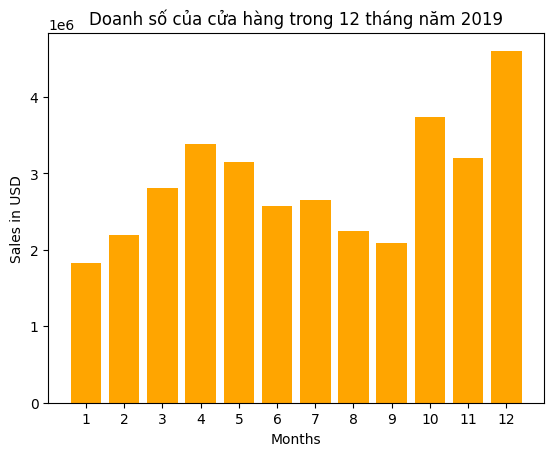

In [ ]:
#Biểu đồ thể hiện doanh số của cửa hàng theo tháng
Months=range(1,13)
plt.bar(x=Months, height=sales_value, color = 'orange')
plt.xticks(Months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.title('Doanh số của cửa hàng trong 12 tháng năm 2019')
plt.show()

> **Ta thấy được tháng 12 có doanh số cao nhất trong năm**








# 3.2 Thành phố nào có doanh số cao nhất?

In [ ]:
#Thêm cột 'City' vào dataframe
dataframe['City'] = dataframe['Purchase Address'].str.split(',').str[1]
dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1.0,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
4,295669,USB-C Charging Cable,1.0,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta
5,295670,AA Batteries (4-pack),1.0,3.84,12/31/2019 22:58,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City
6,295671,USB-C Charging Cable,1.0,11.95,12/16/2019 15:10,"928 12th St, Portland, OR 97035",12,11.95,Portland


In [ ]:
#Tổng hợp doanh số theo thành phố
dataframe.groupby('City').sum()['Sales']

,Sales
City,
Atlanta,2791499.08
Austin,1817729.38
Boston,3657474.67
Dallas,2765359.01
Los Angeles,5447980.30
New York City,4661813.30
Portland,2319220.00
San Francisco,8251928.93
Seattle,2745010.60


In [ ]:
#Doanh số lớn nhất trong các thành phố
sales_value_city= dataframe.groupby(['City']).sum()['Sales']
print("Doanh số lớn nhất trong các thành phố: ",sales_value_city.max())

Doanh số lớn nhất trong các thành phố:  8251928.93


In [ ]:
#Các giá trị của cột 'Cities'
Cities=[city for city, sales in sales_value_city.items()]
print(Cities)

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


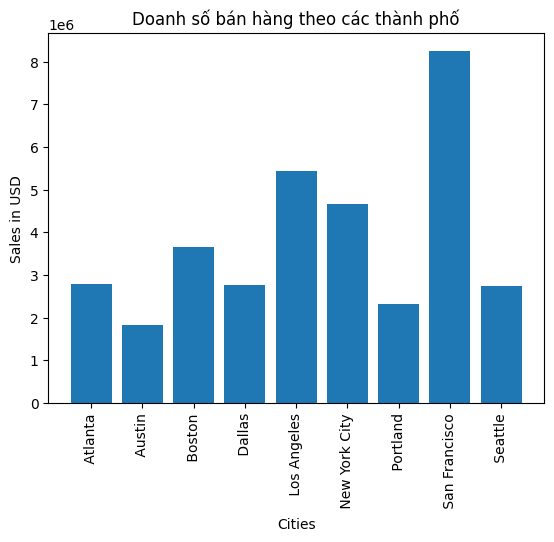

In [ ]:
#Biểu đồ thể hiện doanh số bán hàng theo các thành phố
plt.bar(x=Cities, height=sales_value_city)
plt.xticks(Cities,rotation=90)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.title('Doanh số bán hàng theo các thành phố')
plt.show()

> **Ta thấy được thành phố San Francisco có doanh số lớn nhất trong năm**

# 3.3 Doanh nghiệp cần chạy quảng cáo vào khung thời gian nào để tăng khả năng mua hàng của khách hàng?


In [ ]:
#Kiểu dữ liệu của cột 'Order Date'
print(dataframe['Order Date'].dtypes)

object


In [ ]:
# Chuyển đổi cột Order Date sang datetime
dataframe['Order Date'] = pd.to_datetime(dataframe['Order Date'], errors='coerce')

#Kiểm tra lại kiểu dữ liệu cột 'Order Date'
print(dataframe['Order Date'].dtypes)

datetime64[ns]


In [ ]:
#Thêm cột Hours
dataframe['Hours']=dataframe['Order Date'].dt.hour
dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
5,295670,AA Batteries (4-pack),1.0,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,22
6,295671,USB-C Charging Cable,1.0,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland,15


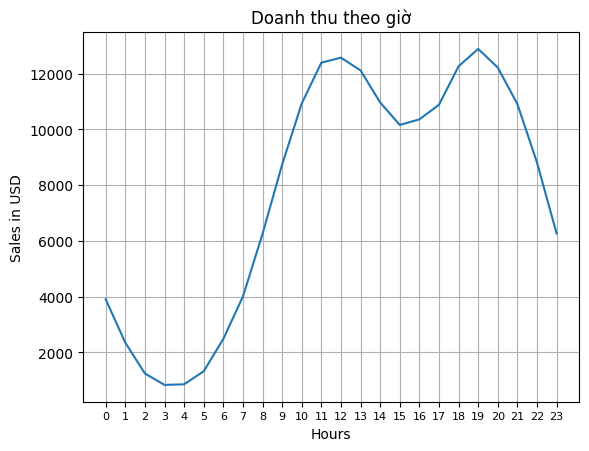

In [ ]:
#Biểu đồ thể hiện doanh thu theo giờ
sales_value_hours=dataframe.groupby('Hours').count()['Sales']
hours=[hour for hour, sales in sales_value_hours.items()]
plt.plot(hours,sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=0,size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.title('Doanh thu theo giờ')
plt.show()

>**Ta thấy được 19 giờ là khung giờ khách hàng mua hàng nhiều nhất. Từ đó doanh nghiệp cần chạy quảng cáo vào khung giờ đó***

# 3.4 Những sản phẩm nào thường được bán cùng nhau?


In [ ]:
#Những sản phẩm được bán trong cùng một Order ID
df_dup=dataframe[dataframe['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
16,295681,Google Phone,1.0,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12
17,295681,USB-C Charging Cable,1.0,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12
18,295681,Bose SoundSport Headphones,1.0,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12
19,295681,Wired Headphones,1.0,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12
36,295698,Vareebadd Phone,1.0,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City,14


In [ ]:
#Kiểm tra kiểu dữ liệu trong cột Product
#print(df_dup['Product'].dtype)

object


In [ ]:
#Kiểm tra kiểu dữ liệu trong cột Order ID
#print(df_dup['Order ID'].dtype)

int64


In [ ]:
#Chuyển tất cả giá trị về chuỗi (bao gồm cả float và NaN)
#df_dup['Product'] = df_dup['Product'].fillna('Unknown').astype(str)

<ipython-input-106-4c33188b15c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['Product'] = df_dup['Product'].fillna('Unknown').astype(str)


In [ ]:
#Kiểm tra lại kiểu dữ liệu của cột Order ID
#print(df_dup['Order ID'].dtype)

In [ ]:
#Chuyển tất cả giá trị về chuỗi
#dataframe['Order ID'] = dataframe['Order ID'].astype(str)
#Nhóm sản phẩm theo Order ID và nối các tên sản phẩm lại với nhau.
df_dup.groupby('Order ID')['Product'].apply(', '.join)

,Product
Order ID,
141275,"USB-C Charging Cable, Wired Headphones"
141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
141365,"Vareebadd Phone, Wired Headphones"
141384,"Google Phone, USB-C Charging Cable"
141450,"Google Phone, Bose SoundSport Headphones"
...,...
319536,"Macbook Pro Laptop, Wired Headphones"
319556,"Google Phone, Wired Headphones"
319584,"iPhone, Wired Headphones"


In [ ]:
#Gộp các sản phẩm
groupProduct= lambda product: ', '.join(product)

#Gán giá trị cho cột All Product
df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup.head()

<ipython-input-43-3f6958cd461e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,All Product
16,295681,Google Phone,1.0,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12,"Google Phone, USB-C Charging Cable, Bose Sound..."
17,295681,USB-C Charging Cable,1.0,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12,"Google Phone, USB-C Charging Cable, Bose Sound..."
18,295681,Bose SoundSport Headphones,1.0,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12,"Google Phone, USB-C Charging Cable, Bose Sound..."
19,295681,Wired Headphones,1.0,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,Vareebadd Phone,1.0,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City,14,"Vareebadd Phone, USB-C Charging Cable"


In [ ]:
#Lấy ra df mới chỉ bao gồm Order ID và All Prodcut sau đó bỏ các dòng trùng lặp
df_dup[['Order ID', 'All Product']].drop_duplicates()

,Order ID,All Product
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"
76,295735,"iPhone, Apple Airpods Headphones, Wired Headph..."
...,...,...
185916,222863,"27in FHD Monitor, Bose SoundSport Headphones"
185922,222868,"iPhone, Apple Airpods Headphones"
185937,222882,"Apple Airpods Headphones, AA Batteries (4-pack)"
185940,222884,"Google Phone, USB-C Charging Cable"


In [ ]:
#Đếm số lượng lặp lại của all Product
#Các sản phẩm thường được mua cùng nhau nhiều nhất
df_dup['All Product'].value_counts()

,count
All Product,
"iPhone, Lightning Charging Cable",1772
"Google Phone, USB-C Charging Cable",1712
"iPhone, Wired Headphones",722
"Vareebadd Phone, USB-C Charging Cable",624
"Google Phone, Wired Headphones",606
...,...
"LG Dryer, AAA Batteries (4-pack)",2
"ThinkPad Laptop, 34in Ultrawide Monitor",2
"iPhone, LG Washing Machine",2


> **iPhone, Lightning Charging Cable là 2 sản phẩm thường được bán cùng nhau**



# 3.5 Sản phẩm nào được bán nhiều nhất?

In [ ]:
#Kiểm tra kiểu dữ liệu của cột 'Quantity Ordered'
#print(dataframe['Quantity Ordered'].dtypes)

In [ ]:
# Loại bỏ các giá trị không hợp lệ
#dataframe = dataframe.dropna(subset=['Quantity Ordered'])

In [ ]:
#Gộp cột Product và Quantity Ordered
all_products = dataframe.groupby('Product')['Quantity Ordered'].sum()

#Hiển thị
all_products

,Quantity Ordered
Product,
20in Monitor,4124.0
27in 4K Gaming Monitor,6238.0
27in FHD Monitor,7538.0
34in Ultrawide Monitor,6192.0
AA Batteries (4-pack),27611.0
AAA Batteries (4-pack),30984.0
Apple Airpods Headphones,15636.0
Bose SoundSport Headphones,13429.0
Flatscreen TV,4811.0


In [ ]:
#Kiểm tra kiểu dữ liệu của cột 'Price Each'
#dataframe['Price Each'].dtype

dtype('float64')

In [ ]:
#Bỏ các hàng có dữ liệu không hợp lệ
#dataframe = dataframe.dropna(subset=['Price Each'])

In [ ]:
#Gộp cột Product, Price Each và tính giá trị trung bình của mỗi sản phẩm
prices = dataframe.groupby('Product')['Price Each'].mean()
prices

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


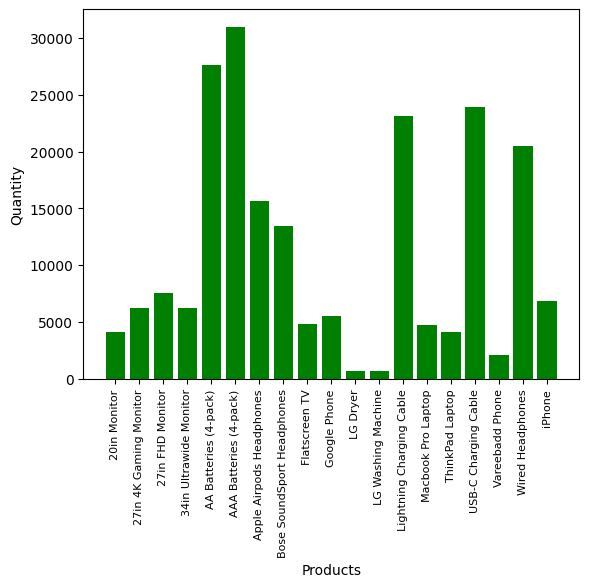

In [ ]:
#Biểu đồ số lượng bán ra theo từng loại sản phẩm
products_ls=[product for product, quant in all_products.items()]
plt.bar(products_ls ,all_products, color='green')
plt.xticks(products_ls, rotation=90, size=8)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show()

<ipython-input-50-a676d48e0966>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products_ls, rotation=90, size=8)


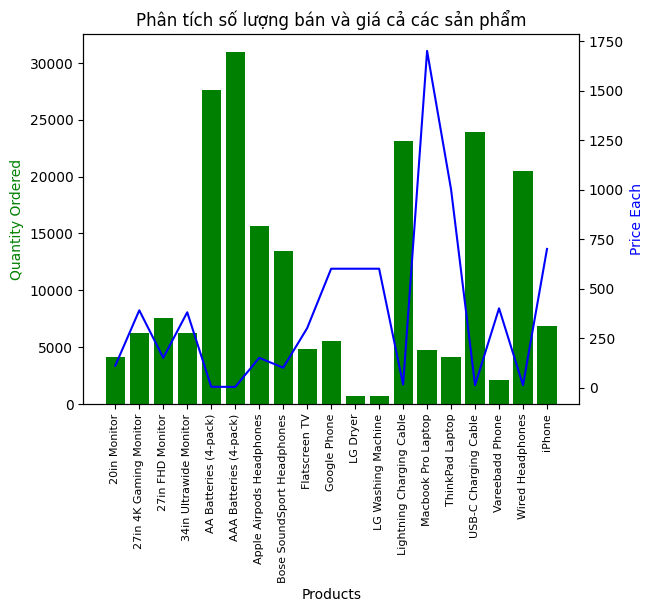

In [ ]:
x=products_ls
y1=all_products
y2=prices
fig, ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(x,y1,color='g')
ax2.plot(x,y2,'b-')
ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')
plt.title('Phân tích số lượng bán và giá cả các sản phẩm')
plt.show()



> **Ta thấy được sản phẩm được bán nhiều nhất là AAA Batteries (4-pack) nhưng có giá trung bình bán thấp nhất**



# 3.6 Word Cloud

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

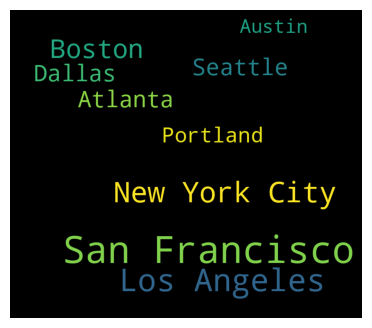

In [ ]:
# Đếm số lần xuất hiện của thành phố
city_counts = dataframe['City'].value_counts()

# Tạo biểu đồ WordCloud
wordcloud = WordCloud(width=800, height=700, random_state=10, background_color='black', max_words = 10).generate_from_frequencies(city_counts.to_dict())
plt.figure(figsize=(5, 4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

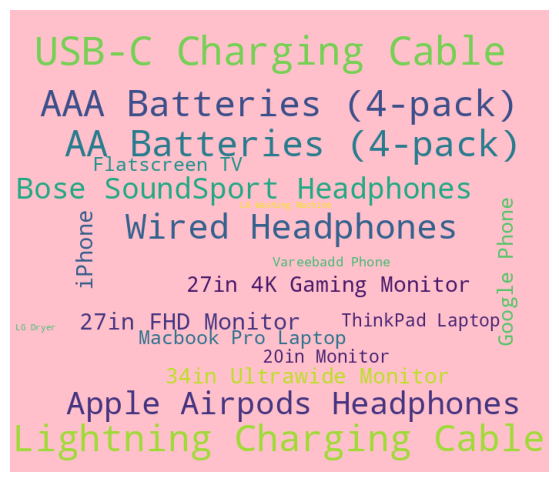

In [55]:
# Đếm số lượt xuất hiện của sản phẩm
product_counts = dataframe['Product'].value_counts()

# Tạo biểu đồ WordCloud
wordcloud = WordCloud(width=700, height=600, random_state=60, background_color='pink', stopwords=STOPWORDS, max_words = 20).generate_from_frequencies(product_counts.to_dict())
plt.figure(figsize=(7, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()